# Dimensionality Reductions with Principal Component Analysis

Working directly with high-dimensional data, such as images, comes with some difficulties: It is hard to analyze, interpretation is difficult, visualisation is nearly impossible, and (from a practical point of view) storage of the data vectors can be expensive. However, high-dimensional data often has properties that we can exploit. For example, high-dimensional data is often overcomplete, i.e., many dimensions are redundant and can be explained by a combination of other dimensions. Furthermore, dimensions in high-dimensional data are often correlated so that the data possesses an intrinsic lower-dimensional structure. Dimensionality reduction exploits structure and correlation and allows us to work with a more compact representation of the data, ideally without losing information. We can think of dimensionality reduction as a compression technique.

Principal component analysis (PCA) is an algorithm for linear dimensionality reduction. It is also used for the identification of simple patterns, latent factors, and structures of high-dimensional data. Here, we derive PCA from first principles, drawing on our understanding of basis and basis change, projections, eigenvalues, Gaussian distributions, and constrained optimisation.

Dimensionality reduction generally exploits a property of high-dimensional data (e.g., images) that it often lies on a low-dimensional subspace.

## Problem Setting

In PCA, we are interested in finding projections $\tilde{x}_n$ of data points $x_n$ that are similar to the original data points as possible, but which have a significantly lower instrinsic dimensionality.

More concretely, we consider an i.i.d. dataset $\mathcal{X} = \{x_1, \cdots, x_N\}, x_n, \in \mathbb{R}^D$ with mean 0 that possesses the data covariance matrix

\begin{equation}
S = \frac{1}{N} \sum^N_{n=1}x_n x_n^{\top}
\end{equation}

Furthermore, we assume there exists a low-dimensional compressed representation

\begin{equation}
z_n = B^{\top}x_n \in \mathbb{R}^M
\end{equation}

of $x_n$, where we define the projection matrix

\begin{equation}
B := [b_1, \cdots, b_M] \in \mathbb{R}^{D \times M}
\end{equation}

We assume that the columns of B are orthonormal (perpendicular/orthogonal) so that $b_i^{\top}b_j = 0$ if and only if $i \neq j$ and $b_i^{\top}b_i = 1$ Weseek an M-dimensional subspace  $U \subseteq \mathbb{R}^D$, $dim(U) = M < D$ onto which we project the data. We denote the projected data by $\tilde{x}_n \in U$ and their coordinates (with respect to the basis vectors $b1, \cdots, b_M of U)$ by $z_n$. Our aim is to find projections $\tilde{x}_n \in \mathbb{R}^D$ (or equivalently the codes $z_n$ and the basis vectors $b_1, \cdots , b_M$) so that they are as similar to the original data xn and minimize the loss due to compression.

Figure below illustrates the setting we consider in PCA, where $z$ represents the lower-dimensional representation of the compressed data $\tilde{x}$ and plays the role of a bottleneck, which controls how much information can flow between $x$ and $\tilde{x}$. In PCA, we consider a linear relationship between the original data $x$ and its low-dimensional code $z$ so that $z = B^\topx$ and $\tilde{x} = B_z$ for a suitable matrix $B$. Based on the motivation of thinking of PCA as a data compression technique, we can interpret the arrows in the figure below as a pair of operations representing encoders and decoders. The linear mapping represented by $B$ can be thought of as a decoder, which maps the low-dimensional code $z \in \mathbb{R}^M$ back into the original data space $\mathbb{R}^D$. Similarly, $B^{\top}$ can be thought of an encoder, which encodes the original data $x$ as a low-dimensional (compressed) code $z$.

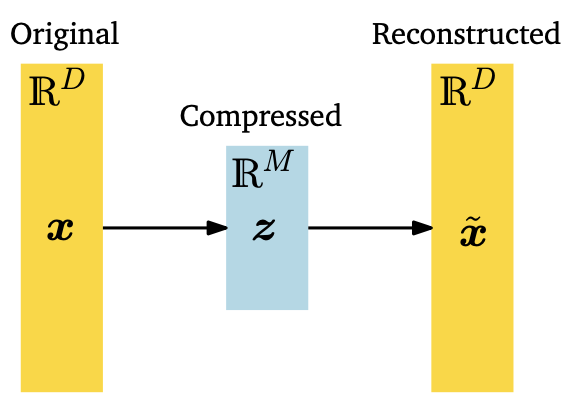

_Graphical illustration of PCA. In PCA, we find a compressed version $z$ of original data $x$. The compressed data can be reconstructed into $\tilde{x}$, which lives in the original data space, but has an intrinsic lower-dimensional representation than $x$._

## Maximum Variance Perspective

If we interpret information content in the data as how "space filling" the dataset is, then we can describe the information contained in the data by looking at the spread of the data. We know that the variance is an indicator of the spread of the data, and we can derive PCA as a dimensionality reduction algorithm that maximizes the variance in the low-dimensional representation of the data to retain as much information as possible. Figure below illustrates this:

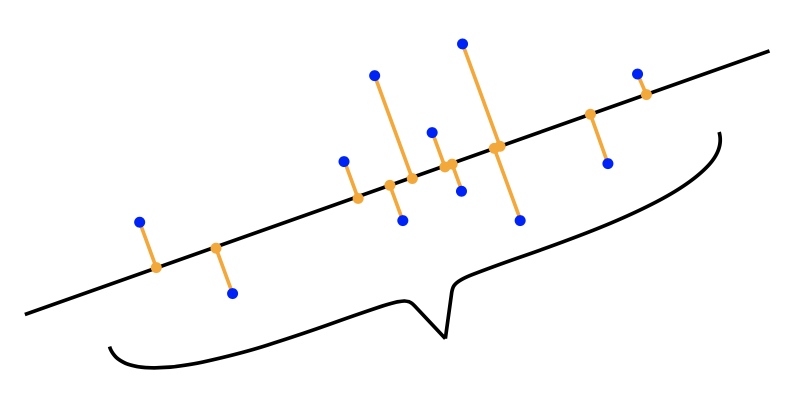

_PCA finds a lower-dimensional subspace (line) that maintains as much variance (spread of the data) as possible when the data (blue) is projected onto this subspace (orange)_

Considering the setting discussed above, our aim is to find a matrix $B$ that retains as much information as possible when compressing data by projecting it onto the subspace spanned by the columns $b_1,\cdots,b_M\text{ of }B$. Retaining most information after data compression is equivalent to capturing the largest amount of variance in the low-dimensional code.

### Direction with Maximal Variance

We maximize the variance of the low-dimensional code using a sequential approach. We start by seeking a single vector $b_1 \in \mathbb{R}^D$ that maximizes the variance of the projected data, i.e., we aim to maximize the variance of the first coordinate $z_1$ of $z \in \mathbb{R}^M$ so that

\begin{equation}
V_1 := \mathbb{V}[z_1] = \frac{1}{N}\sum^N_{n=1} z^2_{1n}
\end{equation}

is maximised, where we exploited the i.i.d. assumption of the data and defined $z_{1n}$ as the first coordinate of the low-dimensional representation $z_n \in \mathbb{R}^M \text{ of } x_n \in \mathbb{R}^D$. Note that first component of $z_n$ is given by

\begin{equation}
z_{1n} = b_1^{\top}x_n
\end{equation}

i.e., it is the coordinate of the orthogonal projection of $x_n$ onto the one-dimensional subspace spanned by $b_1$. We substitute above into the one above that, which yields

\begin{equation}
V_1 = \frac{1}{N}\sum^N_{n=1}(b_1^{\top}x_n)^2 = \frac{1}{N}\sum^N_{n=1}b_1^{\top}x_nx_n^{\top}b_1 \\
= b_1^{\top} \left( \frac{1}{N} \sum_{n=1}^{N} x_n x_n^{\top} \right) b_1 = b_1^{\top}Sb_1
\end{equation}

where $S$ is the data covariance matrix.

In [ ]:
\mathcal{X}

In [ ]:
\mathbb{R}